In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df["TotalCharges"] =  df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] =  df["TotalCharges"].astype("float")

In [5]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum() #for finding overall duplicate values in the given dataset

0

In [11]:
df['customerID'].duplicated().sum() #for finding unique columns & values

0

In [40]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)   
#Converted the value of SeniorCitizen from 0 & 1 to No & Yes for better understanding

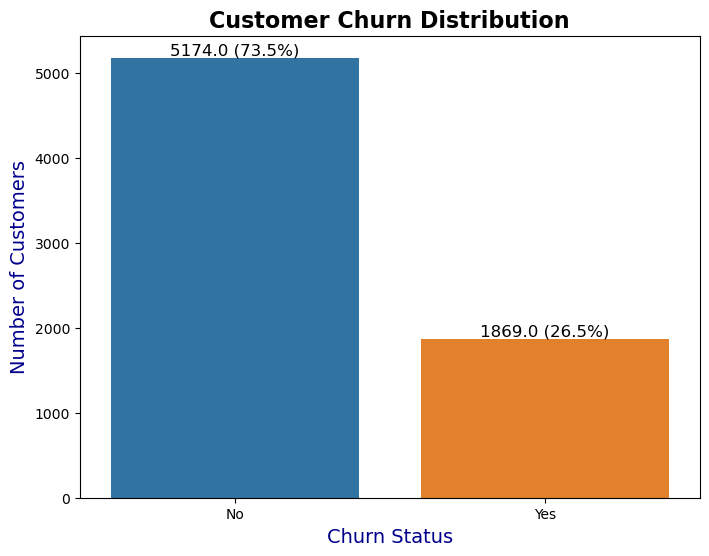

In [17]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Churn', data=df, hue ='Churn')
total = len(df)
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()} ({v.get_height()/total:.1%})' for v in container], fontsize=12)

plt.title('Customer Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=14, color='darkblue')
plt.ylabel('Number of Customers', fontsize=14, color='darkblue')
plt.show()

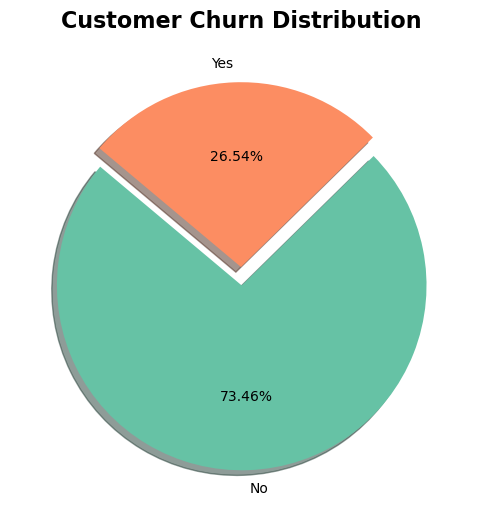

In [19]:
gb = df.groupby("Churn").agg({'Churn': 'count'})

plt.figure(figsize=(8, 6)) 
colors = ['#66c2a5', '#fc8d62']  # Custom colors for each slice
explode = (0.1, 0)  # Explode the first slice slightly for emphasis

plt.pie(
    gb['Churn'], 
    labels=gb.index, 
    autopct='%1.2f%%',  # Display percentages with two decimal places
    startangle=140,  # Rotate the pie chart for better initial layout
    colors=colors,  # Apply custom colors
    explode=explode,  # Slightly separate the first slice
    shadow=True  # Add shadow for visual depth
)

plt.title("Customer Churn Distribution", fontsize=16, fontweight='bold')
plt.show()

Based on the pie chart, we can conclude that 26.54% of our customers have churned. 
Let's now explore the possible reasons and factors contributing to this churn.

In [22]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


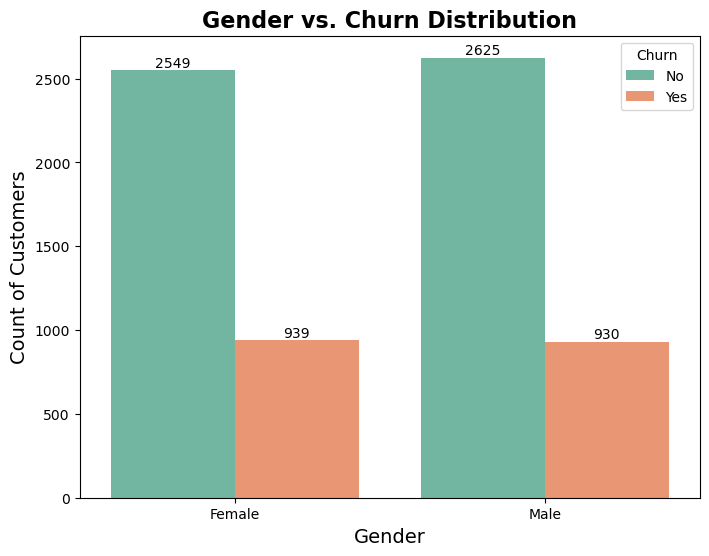

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size for better readability
plt.figure(figsize=(8, 6))

# Create countplot with customizations
ax = sns.countplot(
    x='gender',  # X-axis variable, displaying counts of each gender
    data=df,  # Data source
    hue='Churn',  # Color the bars by the 'Churn' variable for comparison
    palette='Set2'  # Use a color palette to distinguish 'Churn' categories
)

# Add labels to each bar for count values
for container in ax.containers:
    ax.bar_label(container)

# Set the title and axis labels
plt.title("Gender vs. Churn Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count of Customers", fontsize=14)

# Display the plot
plt.show()

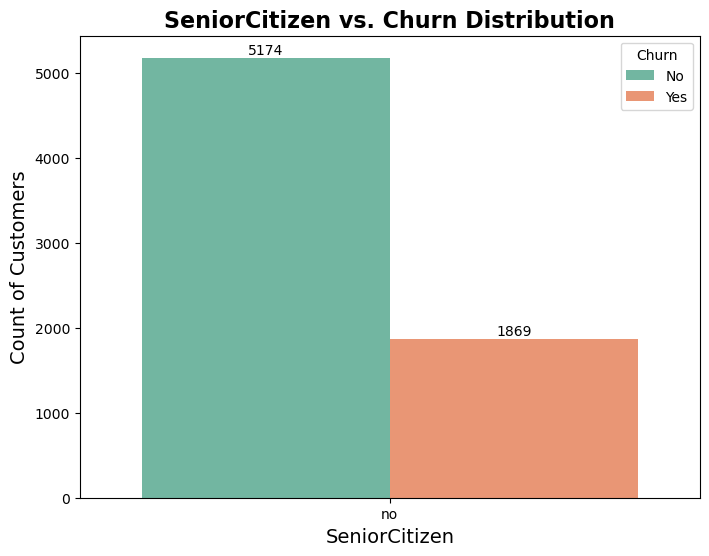

In [26]:
plt.figure(figsize=(8, 6))

# Create countplot with customizations
ax = sns.countplot(
    x='SeniorCitizen',  # X-axis variable, displaying counts of each gender
    data=df,  # Data source
    hue='Churn',  # Color the bars by the 'Churn' variable for comparison
    palette='Set2'  # Use a color palette to distinguish 'Churn' categories
)

# Add labels to each bar for count values
for container in ax.containers:
    ax.bar_label(container)

# Set the title and axis labels
plt.title("SeniorCitizen vs. Churn Distribution", fontsize=16, fontweight='bold')
plt.xlabel("SeniorCitizen", fontsize=14)
plt.ylabel("Count of Customers", fontsize=14)

# Display the plot
plt.show()

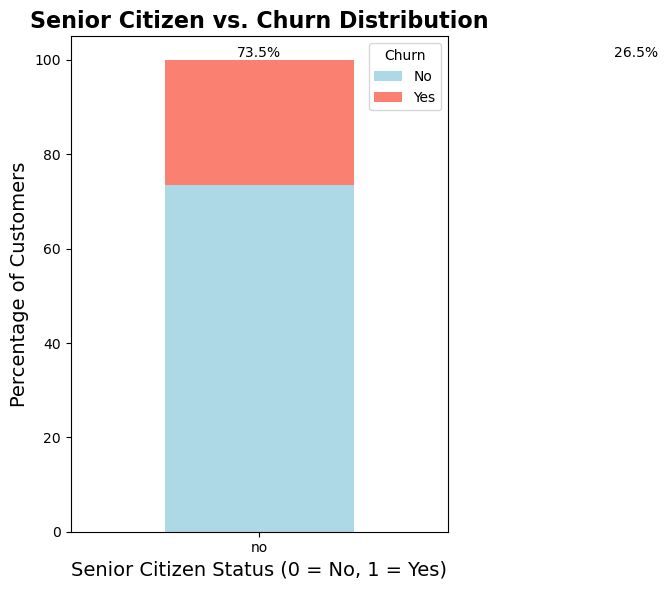

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame creation (Replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Step 1: Calculate the counts of churn by SeniorCitizen
churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Convert counts to percentages
churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

# Step 3: Plotting the stacked bar chart
ax = churn_percentage.plot(kind='bar', stacked=True, figsize=(8, 6), color=['lightblue', 'salmon'])

# Step 4: Adding percentage labels
for i in range(len(churn_percentage)):
    total = churn_percentage.iloc[i].sum()
    for j in range(len(churn_percentage.columns)):
        percentage = churn_percentage.iloc[i, j]
        ax.text(j, total, f'{percentage:.1f}%', ha='center', va='bottom')

# Customize plot
plt.title("Senior Citizen vs. Churn Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Senior Citizen Status (0 = No, 1 = Yes)", fontsize=14)
plt.ylabel("Percentage of Customers", fontsize=14)
plt.xticks(rotation=0)  # Keep x-ticks horizontal
plt.legend(title='Churn', labels=['No', 'Yes'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


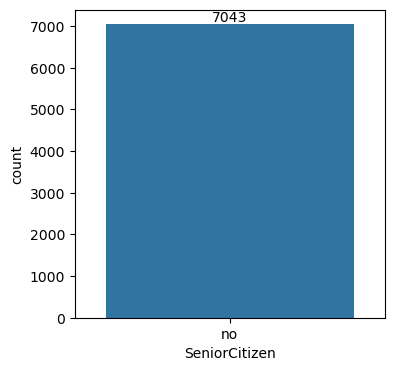

In [38]:
plt.figure(figsize= (4,4))
ax = sns.countplot(x="SeniorCitizen", data =df)
ax.bar_label(ax.containers[0])
plt.show()

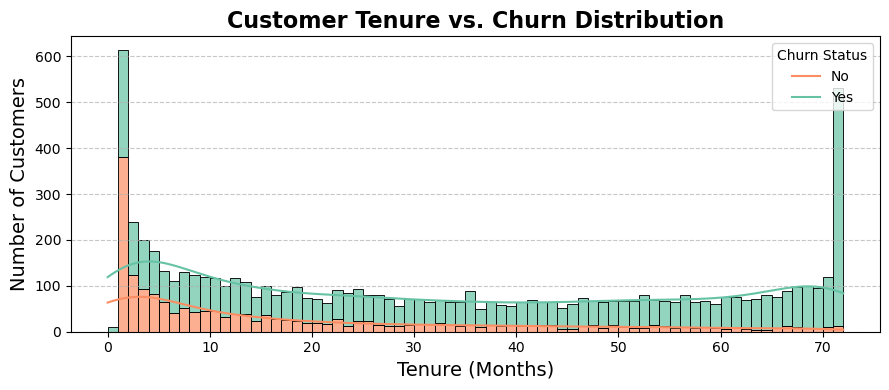

In [48]:
plt.figure(figsize=(9, 4))

sns.histplot(
    x='tenure',             # The variable for the x-axis
    data=df,               # The DataFrame containing the data
    bins=72,               # Number of bins for the histogram
    hue='Churn',           # Use the 'Churn' variable to color the bars
    multiple='stack',      # Stack the bars for a clearer visual comparison
    kde=True,              # Add a Kernel Density Estimate for better distribution visualization
    palette='Set2',        # Custom color palette for different churn statuses
    alpha=0.7              # Set transparency for the bars
)

# plot with a title and labels
plt.title("Customer Tenure vs. Churn Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Tenure (Months)", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)

plt.legend(title='Churn Status', labels=['No', 'Yes'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


People who have used our services for long time have stayed. And people who have used our services, like 1 or 2 months, have churned

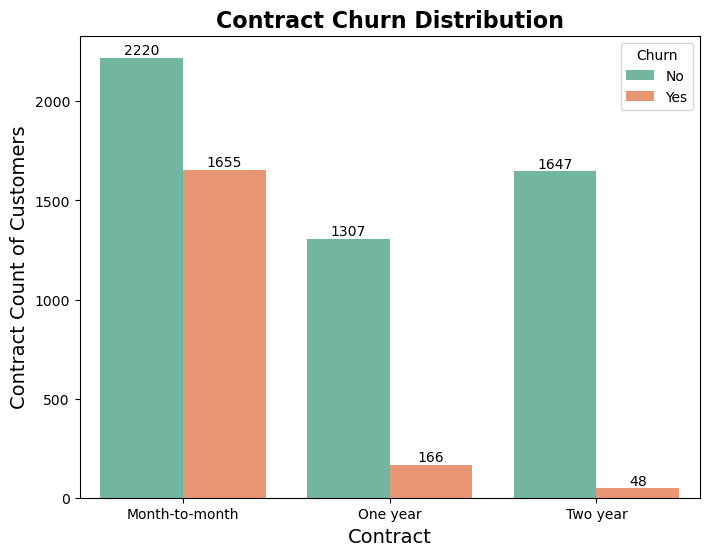

In [59]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(
    x='Contract',  # X-axis variable
    data=df,  # Data source
    hue='Churn',  # Color the bars by the 'Churn' variable for comparison
    palette='Set2'  # Use a color palette to distinguish 'Churn' categories
)

# Add labels to each bar for count values
for container in ax.containers:
    ax.bar_label(container)

# Set the title and axis labels
plt.title("Contract Churn Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Contract", fontsize=14)
plt.ylabel("Contract Count of Customers", fontsize=14)

plt.show()

Individuals with month-to-month contracts are more likely to churn compared to those with one- or two-year contracts.

In [66]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

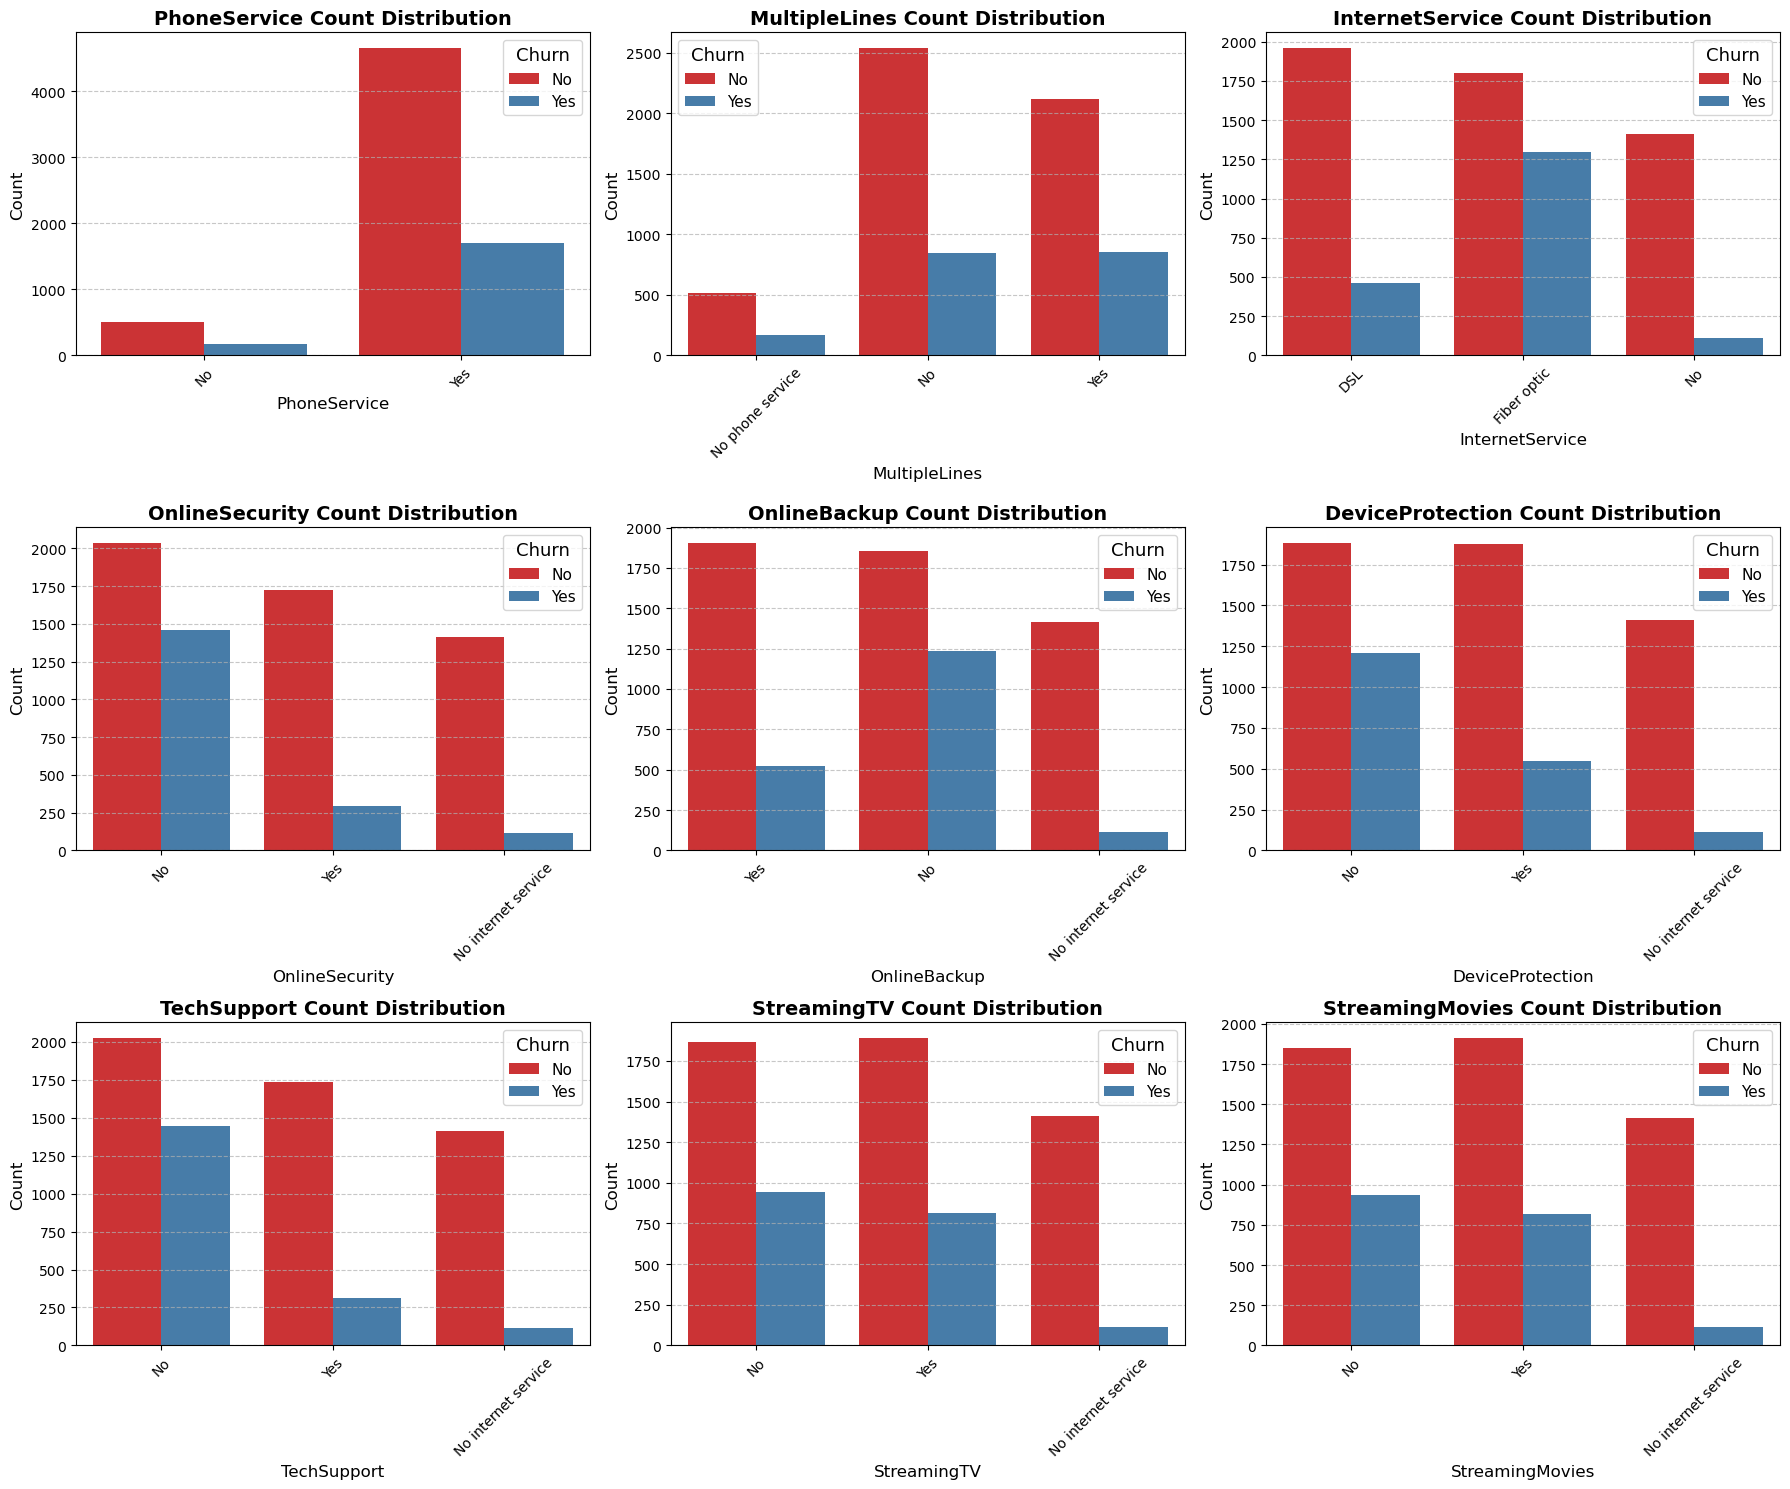

In [88]:
features = ['PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the number of rows and columns for subplots
num_features = len(features)
cols = 3  # Number of columns
rows = (num_features + cols - 1) // cols  # Calculate number of rows needed

# Set the figure size for better readability
plt.figure(figsize=(18, rows * 5))  # Increased height for better visibility

# Loop through the features to create subplots
for i, feature in enumerate(features):
    plt.subplot(rows, cols, i + 1)  # Create a subplot
    ax = sns.countplot(x=feature, data=df, hue='Churn', palette='Set1')  # Create count plot with a color palette

    # Add percentage labels to each bar
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100  # Calculate percentage

    # Set title and labels
    plt.title(f"{feature} Count Distribution", fontsize=14, fontweight='bold')  # Increased title font size
    plt.xlabel(feature, fontsize=12)  # Set x-label with increased font size
    plt.ylabel("Count", fontsize=12)  # Set y-label with increased font size
    plt.xticks(rotation=45)  # Rotate x-ticks for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines for better readability

    # Add legend to the plot
    plt.legend(title='Churn', title_fontsize='13', fontsize='11')  # Legend for Churn categories

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Key Insights:

# Phone Service & Multiple Lines:

- PhoneService: Customers with phone service are much less likely to churn than those without it.

- MultipleLines: For those with phone service, having multiple lines seems to show slightly higher churn than having a single line.
Internet Service:

- Customers with Fiber optic internet have higher churn rates compared to those with DSL or no internet service, suggesting that Fiber optic customers may be experiencing issues that lead to dissatisfaction.

# Online Security & Backup:

- OnlineSecurity: Customers without online security are more likely to churn, indicating that providing this service could be important for retention.

- OnlineBackup: Similarly, customers without online backup tend to churn more than those who have it, showing the potential value of backup services.
Device Protection:
- There’s a higher churn rate among customers without device protection compared to those with it, though the difference isn't as large as with security or backup.

# Tech Support:

- Customers without tech support show a significant increase in churn compared to those with support, suggesting tech support might be crucial for customer satisfaction.

# Streaming Services (TV & Movies):

- StreamingTV and StreamingMovies: Customers with these services show higher churn rates than those without them, possibly indicating these services aren’t as effective in retaining customers or may have issues that lead to dissatisfaction.

# Summary:

* The lack of Online Security, Online Backup, and Tech Support are associated with higher churn rates, indicating these services might improve retention.
* Fiber optic internet users are more likely to churn than DSL users, which could point to issues specific to the Fiber service.
* Streaming services don’t seem to contribute significantly to retention, with users of these services showing higher churn rates.

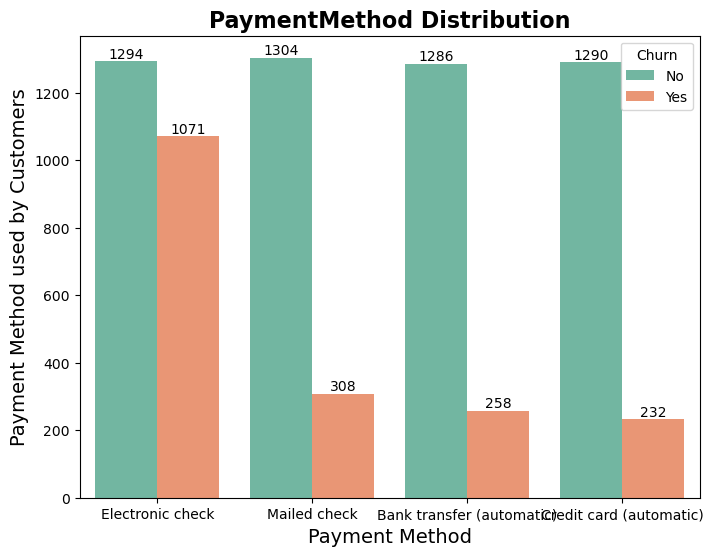

In [113]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(
    x='PaymentMethod',  # X-axis variable
    data=df,  # Data source
    hue='Churn',  # Color the bars by the 'Churn' variable for comparison
    palette='Set2'  # Use a color palette to distinguish 'Churn' categories
)

# Add labels to each bar for count values
for container in ax.containers:
    ax.bar_label(container)

# title and axis labels
plt.title("PaymentMethod Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Payment Method used by Customers", fontsize=14)

plt.show()

- Customer is like to churn when they're using electronic check as a payment method

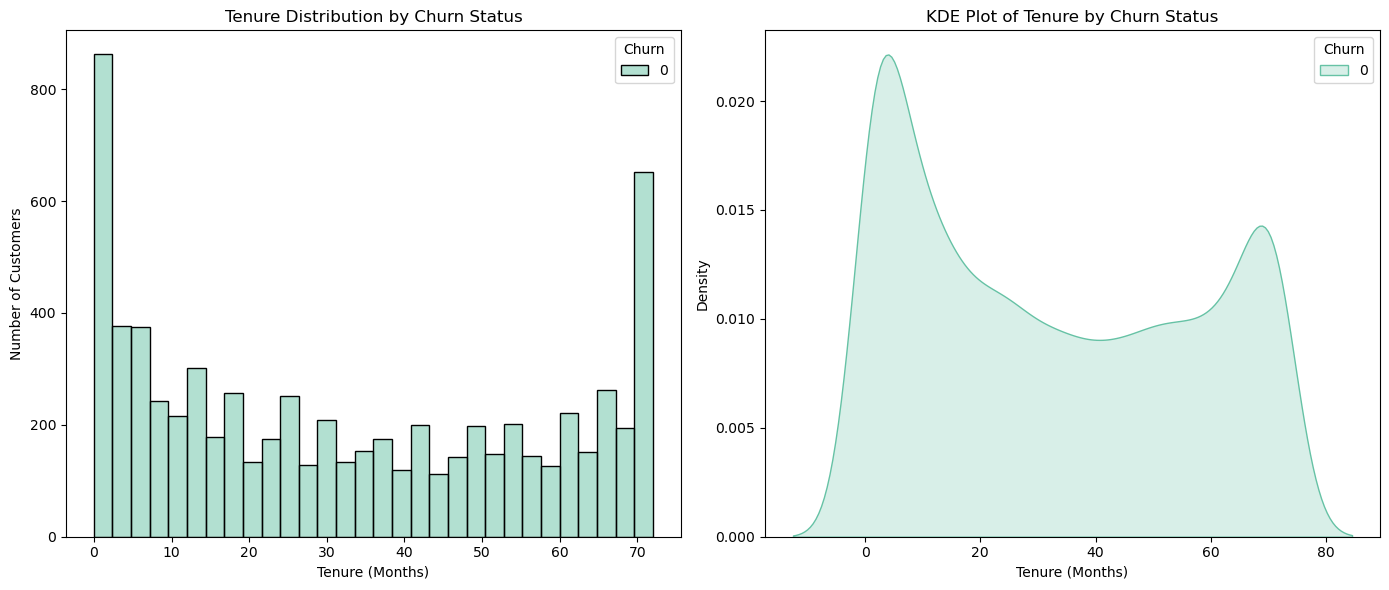

In [126]:
plt.figure(figsize=(14, 6))

# Histogram for tenure distribution with Churn hue
plt.subplot(1, 2, 1)  # First plot in a 1x2 grid
sns.histplot(data=df, x='tenure', hue='Churn', kde=False, bins=30, palette='Set2')
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")

# KDE plot for tenure distribution with Churn hue
plt.subplot(1, 2, 2)  # Second plot in a 1x2 grid
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, palette='Set2')
plt.title("KDE Plot of Tenure by Churn Status")
plt.xlabel("Tenure (Months)")
plt.ylabel("Density")

plt.tight_layout()
plt.show()


- Histogram Plot: Displays the number of customers across different tenure ranges, helping identify if certain tenure periods have higher churn rates.
- KDE Plot: Shows the relative density of churn vs. non-churn customers by tenure, making it easy to see if customers with shorter tenure are more likely to leave.

# Predictive Modeling for Customer Churn